In [42]:


from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Hide code."></form>''')



# Through the Genre Glass
#### A MultiLabel Genre Classification of GoodReads Book Selection

#### Introduction

There are many genres of books that have evolved way more than fiction and non fiction. GoodReads has about 1400+ genres in their library that users use to tag the wide book selection with each booking having multiple genre tags. For example, a book can be classified under finction, fantasy, young adult, etc all at once. 


##### Problem: Multi target or label classification problem!

A multilabel classification is when we have multiple target columns instead of the usual one target column.

### Highlights/Results and Recommendations

To classify the multilabel problem, <b>OneVsRestClassifier</b> will be used with the ML models being fed to it. The data was a highly sparsed data and so the models used are limited to Naive Bayes, Logistic Regression, SVM, and SVC. All of which yielded a close to identical accuracies for each genre target classification and for that, in the interest of time, GBM method was not included because it is expected to yield close to those accuracies. 

Speaking of accuracies, for the top 6 most used genre of 'Fiction', 'Fantasy', 'Romance', 'Historical', 'Paranormal', 'Mystery', the models resulted with the following statistics. Note the <b>PCC's</b>, the <b>accuracies</b> and <b>run times</b>. 

<table>
<tbody>
<tr>
<td>
<p><strong>Type</strong></p>
</td>
<td>
<p><strong>Fiction</strong></p>
</td>
<td>
<p><strong>Fantasy</strong></p>
</td>
<td>
<p><strong>Romance</strong></p>
</td>
<td>
<p><strong>Historical</strong></p>
</td>
<td >
<p><strong>Paranormal</strong></p>
</td>
<td>
<p><strong>Mystery</strong></p>
</td>
<td>
<p><strong>Run Times (h:m:s)</strong></p>
</td>
</tr>
<tr>
<td>
<p>PCC</p>
</td>
<td>
<p>65.31</p>
</td>
<td>
<p>51.32</p>
</td>
<td>
<p>58</p>
</td>
<td >
<p>68.48</p>
</td>
<td>
<p>75.35</p>
</td>
<td>
<p>82.32</p>
</td>
<td>
<p>00:00:00.109</p>
</td>
</tr>
<tr>
<td >
<p>Logistic</p>
<p>Regression</p>
</td>
<td >
<p>78.13</p>
</td>
<td >
<p>63.20</p>
</td>
<td >
<p>73.33</p>
</td>
<td >
<p>80.53</p>
</td>
<td >
<p>85.87</p>
</td>
<td>
<p>91.47</p>
</td>
<td>
<p>00:01:18</p>
</td>
</tr>
<tr>
<td>
<p>SVM</p>
</td>
<td>
<p>78.13</p>
</td>
<td>
<p>63.20</p>
</td>
<td>
<p>73.33</p>
</td>
<td>
<p>80.53</p>
</td>
<td>
<p>85.87</p>
</td>
<td>
<p>91.47</p>
</td>
<td>
<p>00:01:08</p>
</td>
</tr>
<tr>
<td>
<p>SVC</p>
</td>
<td>
<p>77.87</p>
</td>
<td>
<p>63.47</p>
</td>
<td>
<p>73.33</p>
</td>
<td>
<p>80.53</p>
</td>
<td>
<p>85.87</p>
</td>
<td>
<p>91.47</p>
</td>
<td>
<p>13:14:38</p>
</td>
</tr>
<tr>
<td>
<p>Na&iuml;ve Bayes</p>
</td>
<td>
<p>78.13</p>
</td>
<td>
<p>63.20</p>
</td>
<td>
<p>72.8</p>
</td>
<td>
<p>80.8</p>
</td>
<td>
<p>85.87</p>
</td>
<td>
<p>91.47</p>
</td>
<td>
<p>00:02:42</p>
</td>    
</tr>
<tr>
<td></td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>
<p>Validation</p>
</td>
<td>
<p>65.53</p>
</td>
<td>
<p>56.27</p>
</td>
<td>
<p>65.27</p>
</td>
<td>
<p>84.2</p>
</td>
<td>
<p>83</p>
</td>
<td>
<p>87.33</p>
</td>
<td>
<p>00:02:42</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>

All targets have accuracies above PCC but there could be other words in the decriptions that could identify the books as much. 

The heaviest features resulted to be those of author names. Although, if only the authors were used as features, I noticed that the accuracies went down significantly meaning that the tokens under the descriptions and titles still play a big part in predictability of the multi targets.

#### Recommendations

Imagine if this was applied to more than 6 genres and if there were more samples to generate different token features. It is something worth exploring. 

If computational power were not an issue, the GBM method could also be explored. I would have also liked to look at the specificity of the predictions but was not able to at this point. 

Both of which are with the goal of increasing prediction accuracies for all genres across the study and beyond.

### Methodology

The methodology found in this notebook are as follows.

1. [Load Data](#load)
    * Only include those with text under genres columns and filter out the rest
2. [Data Cleaning](#clean)
    * Also included an author statistics as partial eda
3. [Data Processing of Targets](#process_targets)
    * Includes target distribution as partial eda
4. [Data Processing of Features](#process_features)
    * Feature vectors saved to a csv
5. [Reload Vectorized Features](#reload)
6. [Check PCCs](#pcc)
7. [Model Processing Using OneVsRestCalssifier](#model)
8. [Feature Importance Check](#features)
9. [Validate](#validation)
    * Validate with SVM
    * Validate with Naive Bayes
    * Validate as a whole OneVsRestClassifier

In [1]:
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from collections import defaultdict, Counter, OrderedDict
# pd.options.display.float_format = '{:,.4g}'.format
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
file_name = 'book_data_train.csv'
# test_file = 'book_data_test.csv'

### Load Data  <a id="load"></a>

Below is a head shot of what the raw data looks like.
> book_authors: the author or authors associated to that book.  
> book_desc: the synopsis of the book  
> book_edition: published edition of the book  
> book_format: how it is availabel in the market today  
> book_isbn: the international identification of that book  
> book_pages: the number of pages of that book  
> book_rating: the average rating users gave on the goodreads website  
> book_rating_count: the number of ratings considered in the averaging of ratings  
> book_review_count: the number of times the book was given a review  
> book_title: the title of the book  
> genres: the genres users have associated that book to be  
> image_url: the location of the book's cover image  

In [4]:
data = pd.read_csv(file_name)
# data_test = pd.read_csv(test_file)

In [5]:
print(data.shape)
# print(data_test.shape)

(54301, 12)


In [6]:
data.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


#### Check for null genres and remove them from the data set

In [7]:
data.isnull().sum()

book_authors             0
book_desc             1331
book_edition         48848
book_format           1656
book_isbn            12866
book_pages            2522
book_rating              0
book_rating_count        0
book_review_count        0
book_title               0
genres                3242
image_url              683
dtype: int64

In [8]:
genres_df = data['genres']

In [9]:
genres_list = []

for g in genres_df:
    if isinstance(g,str):
        genres_list += str(g).split('|')
    

# genres.iloc[0].split('|')
    

#### Top 6 genres for use in this study

In [10]:
genre_df = pd.DataFrame(Counter(genres_list).most_common())
genres = genre_df[genre_df[0] != 'Young Adult'].iloc[:6][0].to_list()
# genres = genres.pop(4)
genres
# genre_df

['Fiction', 'Fantasy', 'Romance', 'Historical', 'Paranormal', 'Mystery']

In [12]:
data_2 = data[~data['genres'].isnull()].copy()

#### Get the records with those genres

The table below shows the head shot of those records that have the aformentioned genres in their genres column.

In [13]:
# data_test.isnull().sum()
# data_2[['genres']] = data_2[['genres']].fillna('Undeterimined')
data_2[data_2['genres'].str.contains('|'.join(genres))]

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...
6,C.S. Lewis|Pauline Baynes,"Journeys to the end of the world, fantastic cr...",Reissue Edition,Paperback,9.78007E+12,767 pages,4.25,437829,9439,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...
7,George Orwell,مزرعة الحيوانات هي رائعة جورج أورويل الخالدة.....,NaN,Paperback,9.78045E+12,122 pages,3.90,2235084,42156,Animal Farm,Classics|Fiction|Science Fiction|Dystopia|Fant...,https://images.gr-assets.com/books/1424037542l...
8,Margaret Mitchell,Gone with the Wind is a novel written by Marga...,NaN,Paperback,9.78045E+12,1037 pages,4.29,969181,17452,Gone with the Wind,Classics|Historical|Historical Fiction|Fiction...,https://images.gr-assets.com/books/1328025229l...
9,J.R.R. Tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,Mass Market Paperback,9.78035E+12,1728 pages,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...


In [14]:
data_2.columns

Index(['book_authors', 'book_desc', 'book_edition', 'book_format', 'book_isbn',
       'book_pages', 'book_rating', 'book_rating_count', 'book_review_count',
       'book_title', 'genres', 'image_url'],
      dtype='object')

In [15]:
cols = ['book_authors', 'book_desc', 'book_pages', 'book_title', 'genres']
data_3 = data_2[data_2['genres'].str.contains('|'.join(genres))][cols]
data_3.loc[:, 'genres'] = (data_3.loc[:, 'genres']
                                .apply(lambda x: x.replace(' ','').replace('|', ' ')))

### Data cleaning <a id="clean"></a>

This includes the following: 
* Combine the author's name as one word
* Remove the word 'pages' from the book_pages column
* Combine description and title text together while removing punctuations

After the cleaning, the head shot of the data now looks like this with to_vector as the combination of title and description.

In [16]:
##cleaning 
def clean_authors(x):
#     print(x)
    x_str = ''.join(re.findall(r'[\w\|]+', str(x))).replace('|', ' ')
    return x_str
    
def clean_pages(x):
#     print(type(x) == str)
    if isinstance(x,str):
#         print(x)
        return re.findall(r'\d+', x)[0]

def clean_desc_title(x):
    if isinstance(x,str):
#         print(x)
#         temp_str = 
        temp_x = re.sub(r'(\w)\.(\w)', r'\1 \2', x)
# temp_split = x.split()
        temp_split = [''.join(re.findall(r'[a-z]+',xt, re.I)) for xt 
                      in re.findall(r'\b\S*\b',temp_x) if xt]
        return ' '.join(temp_split)
        
    else:
        return ''


In [17]:
data_4 = data_3.copy()
data_4.loc[:, 'book_authors'] = data_4.loc[:, 'book_authors'].apply(clean_authors)
data_4.loc[:, 'book_pages'] = data_4.loc[:, 'book_pages'].apply(clean_pages)
data_4.loc[:, 'book_desc'] = data_4.loc[:, 'book_desc'].apply(clean_desc_title)
data_4.loc[:, 'book_title'] = data_4.loc[:, 'book_title'].apply(clean_desc_title)
data_4['to_vector'] = data_4['book_title']+ ' ' + data_4['book_desc']

In [18]:
data_4.head()

,book_authors,book_desc,book_pages,book_title,genres,to_vector
0,SuzanneCollins,Winning will make you famous Losing means cert...,374,The Hunger Games,YoungAdult Fiction ScienceFiction Dystopia Fan...,The Hunger Games Winning will make you famous ...
1,JKRowling MaryGrandPré,There is a door at the end of a silent corrido...,870,Harry Potter and the Order of the Phoenix,Fantasy YoungAdult Fiction,Harry Potter and the Order of the Phoenix Ther...
2,HarperLee,The unforgettable novel of a childhood in a sl...,324,To Kill a Mockingbird,Classics Fiction Historical HistoricalFiction ...,To Kill a Mockingbird The unforgettable novel ...
3,JaneAusten AnnaQuindlen MrsOliphant GeorgeSain...,cosa ormai risaputa che a uno scapolo in poss...,279,Pride and Prejudice,Classics Fiction Romance,Pride and Prejudice cosa ormai risaputa che a...
4,StephenieMeyer,About three things I was absolutely positive F...,498,Twilight,YoungAdult Fantasy Romance Paranormal Vampires...,Twilight About three things I was absolutely p...


In [39]:
# data_4.iloc[0]['book_desc']
# data_4['book_pages']

In [21]:
# data_4.query('book_authors_count > 15')
data_4 = data_4[~data_4['book_pages'].isnull()]

#### Author Stats (EDA)

Printed below is just basic statistics on the author counts. We can see that it ranges from 1 to 51, with the latter being a comic or graphics novel book with many artists credited. Though most books were observed to have 1 to 3 authors. 

In [22]:
data_4['book_authors_count'].describe()

count    38752.000000
mean         1.316861
std          1.251793
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         51.000000
Name: book_authors_count, dtype: float64

### Data Processing of Targets <a id="process_targets"></a>

One hot encode the top 6 genres to have columns of their own and assign a 1 or 0 depending if the origianl genre records has them. 

In [23]:
def one_hot_genres(df, genres):
    target_dict = {x: ix for ix, x in enumerate(genres)}
#     target_dict

    # for key in target_dict.keys():
    # #     print(key)
    #     print(data_4.iloc[0]['genres'].find(key))
    res = []
    for s in df['genres']:
        temp = s.split()
        bow = np.zeros(len(genres))


        for t in temp:
        #     bow[t] +=1
    #         print(t)
            if t in target_dict:
                bow[target_dict[t]] = 1
        res.append(tuple(bow))
    return pd.DataFrame(res, columns=genres, index=df.index)

In [24]:
one_hot = one_hot_genres(data_4, genres)
data_5 = data_4[['book_authors','book_pages', 'to_vector']]
data_ = pd.merge(data_5, one_hot, left_index=True, right_index=True)


In [25]:
print(data_4.shape)
print(one_hot.shape)
print(data_.shape)
data_.head()


(38752, 7)
(38752, 6)
(38752, 9)


,book_authors,book_pages,to_vector,Fiction,Fantasy,Romance,Historical,Paranormal,Mystery
0,SuzanneCollins,374,The Hunger Games Winning will make you famous ...,1.0,1.0,0.0,0.0,0.0,0.0
1,JKRowling MaryGrandPré,870,Harry Potter and the Order of the Phoenix Ther...,1.0,1.0,0.0,0.0,0.0,0.0
2,HarperLee,324,To Kill a Mockingbird The unforgettable novel ...,1.0,0.0,0.0,1.0,0.0,0.0
3,JaneAusten AnnaQuindlen MrsOliphant GeorgeSain...,279,Pride and Prejudice cosa ormai risaputa che a...,1.0,0.0,1.0,0.0,0.0,0.0
4,StephenieMeyer,498,Twilight About three things I was absolutely p...,1.0,1.0,1.0,0.0,1.0,0.0


#### Genre Distribution 

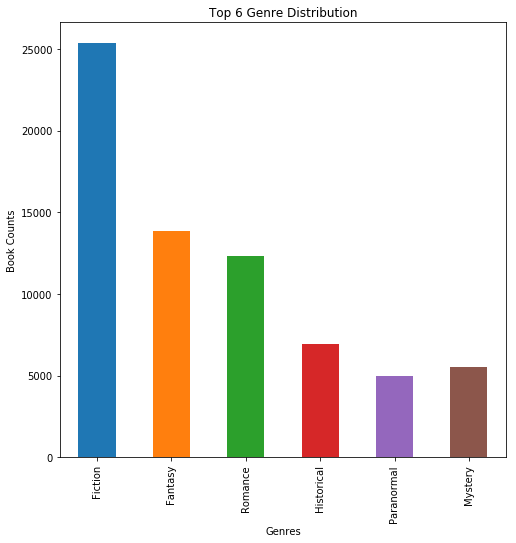

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
data_[genres].sum().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5'] )
plt.title('Top 6 Genre Distribution');
plt.ylabel('Book Counts');
plt.xlabel('Genres');

The graph above shows the distrubution of books that have those genres assigned to them.

### Data processing of Features <a id="process_features"></a>

Authors:
    
    Using the CountVectorizer, the authors were one hot encoded as well to have their own column with a 1 or 0 value. Below are the hyper parameters used.
> lowercase: True     
token_pattern: '[a-zA-Z]+'  
tranformed data: book authors  

Description and Titles
    
    The combined book descriptions and authors were vectorized using TfidfVectorizer with values equivalent to their weights based on their inverse document frequencies. The parameters used are as follows.
> lowercase: True  
token_pattern: '[a-zA-Z]+'  
stop_words: 'english'  
mid_df: 20  


These were combined as feature vectors and stored in vectors_2.csv.

In [27]:
# # #count vectorize for authors

# cnt = CountVectorizer(lowercase=True, token_pattern='[a-zA-Z]+')
# author_vec = cnt.fit_transform(data_['book_authors'])
# author_vec.shape

In [45]:
# cnt.vocabulary_

In [46]:
# data_[data_['book_authors'].str.lower().str.contains('suzannecollins')]
# np.sum(author_vec[:, 23726])

In [36]:
# tfidf = TfidfVectorizer(lowercase=True, stop_words='english', 
#                         token_pattern='[a-zA-Z]+',
#                         min_df=20)
# vec = tfidf.fit_transform(data_['to_vector'])
# vec.shape

(38752, 14257)

In [48]:
# tfidf.vocabulary_

In [49]:
# vec.shape

In [50]:
# pages = data_['book_pages'].values.reshape(len(data_['book_pages'].values),1)
# pages.shape
# pages[i].tolist()

(38752, 1)

In [33]:
# vec2
# data_['to_vector'].iloc[0]

In [37]:
# headers_tfidf = sorted(tfidf.vocabulary_, key=lambda kv: tfidf.vocabulary_[kv])
# headers_cnt = sorted(cnt.vocabulary_, key=lambda kv: cnt.vocabulary_[kv])

In [39]:
# len(headers_tfidf)
# len(headers_cnt)

19560

In [36]:
# headers = headers_cnt + headers_tfidf + ['pages']

In [37]:
# ','.join(headers)

In [38]:
# # X = np.concatenate((pages, vec2.toarray()), axis=1)
# # print(vec.toarray().shape)
# # print(pages.shape)

# # x_array = []
# with open('vectors_2.csv', 'w') as f: 
#     f.write(','.join(headers))
#     f.write('\n')
#     for i in range(pages.shape[0]):
#         vec_item = ','.join(author_vec[i, :].toarray()[0].astype(str).tolist()
#                             + vec[i, :].toarray()[0].astype(str).tolist() 
#                             + pages[i].tolist())
#     #     print(vec[i, :].toarray()[0].tolist() + pages[i])
#     #     print(np.sum(vec[i, :]))
#         f.write(vec_item)
#         f.write('\n')
        
# #6m22s

### Reload of vectors under data_vec <a id="reload"></a>

We now reload those vectors and combine it with the scaled pages feature.

In [ ]:
# with open('vectors.csv', 'r') as f:
#     data_vec = pd.read_cf.readlines()
# import random
# skip_idx = random.sample(range(1, data_.shape[0]), data_.shape[0]-5000)
# data_vec = pd.read_csv('vectors_2.csv', skiprows=skip_idx, header=0)
data_vec = pd.read_csv('vectors_2.csv', nrows=1500, header=0)
# data_vec2 = pd.read_csv('vectors_2.csv',nrows=1500, header=0).iloc[:, :15744]

In [29]:
# data_vec.head()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
scale=  MinMaxScaler()
# data_vec['pages.1'] = scale.fit_transform(data_vec['pages.1'])

In [30]:
# h = data_vec.drop('pages.1', axis=1)
# scale.fit_transform(data_vec['pages.1'].values.astype(float))
data_vec['pages.1'] = scale.fit_transform(data_vec['pages.1'].values.reshape(-1, 1))
# data_vec['pages.1'].values

In [94]:
data_vec.head()

,a,aaattanasio,aamilne,aansyafrani,aaronasher,aaronbpowell,aarondembskibowden,aaronehasz,aaronhartzler,aaronjennings,...,zombies,zone,zoo,zu,zum,zur,zurck,zwei,zwischen,pages.1
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088815
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206602
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076941
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066255
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118262


Above is a head shot of the vecotrized feature set.

In [31]:
X = data_vec.values
X.shape

(1500, 27347)

In [32]:
# one_hot[5000]

In [33]:
y = one_hot[:1500]
y.shape

(1500, 6)

### Checking of PCC per genre <a id='pcc'></a>

Below is a print out of what the PCC and thresholds are for each genre in our study.

In [55]:
for g in genres:
    counts = y[g].value_counts()
#     print(counts)
    pcc = np.sum((counts/len(y[g]))**2)
    print(f"1.25 * Proportional Chance Criterion {g} {pcc*1.25}")

1.25 * Proportional Chance Criterion Fiction 0.8163611111111111
1.25 * Proportional Chance Criterion Fantasy 0.6415377777777778
1.25 * Proportional Chance Criterion Romance 0.725
1.25 * Proportional Chance Criterion Historical 0.8560400000000001
1.25 * Proportional Chance Criterion Paranormal 0.9418399999999999
1.25 * Proportional Chance Criterion Mystery 1.02901


### Model processing <a id='model'></a>

As earlier mentioned, OneVsRestClassifier will be used with the Naive Bayes, Logistic Regression, SVM, and SVC models being used to it. With respect to time, the accuracies have been printed as they were being processed per genre. 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import (RandomForestClassifier, 
                             GradientBoostingClassifier,
                             RandomForestRegressor,
                             GradientBoostingRegressor)

from functools import partial
from sklearn.model_selection import cross_val_score
from tqdm.autonotebook import tqdm

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer as SI
from sklearn.model_selection  import GridSearchCV

In [35]:
params_gs = {
    'KNClassifier':{'n_neighbors': [1,3, 5, 7, 9, 11, 13, 15]},
    'LogisticRegression L1': {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100 ]},
    'LogisticRegression L2': {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]},
    'SVM L1': {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]},
    'SVM L2': {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]},
    'SVC RBF': {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100], 
               'gamma': [1e-12, 1e-10, 1e-8, 1e-4, 1e-3,0.1, 1, 2, 3, 5, 10]},
    'SVC POLY': {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100], 
                 'degree': [3],
                 'coef0': [0,5,10]},
    'Bayes':{'alpha': [1e-4, 1e-3, 1e-2,0.1, 1, 2, 5, 10]},
    'GBM': {'n_estimators': [100, 500, 1000], 
                      'max_features' :  [None, 3, 5, 'auto'],
                      'learning_rate': np.arange(0.1, 3, 0.3).tolist(),
                      'max_depth' : list(range(3, 10,2))#+[None],
                     },
            
    
}

In [36]:
classfiy_gs_models = {
    'Bayes_Bernouli': GridSearchCV(BernoulliNB(), param_grid=params_gs['Bayes'],
                                 iid=False, cv=5,verbose=5,
                                 n_jobs=-1),
        'Bayes_Multionomial': GridSearchCV(MultinomialNB(), param_grid=params_gs['Bayes'],
                                 iid=False, cv=5,verbose=5,
                                 n_jobs=-1),
        'LogisticRegression L1': GridSearchCV(LogisticRegression(penalty='l1',
                                          solver='liblinear'),
                                 iid=False, cv=5, verbose=5,
                                 param_grid=params_gs['LogisticRegression L1'], n_jobs=-1),
        'LogisticRegression L2': GridSearchCV(LogisticRegression(penalty='l2',
                                          solver='liblinear'),
                                 iid=False, cv=5, verbose=5,
                                 param_grid=params_gs['LogisticRegression L2'], n_jobs=-1),
        'SVM L1':  GridSearchCV(LinearSVC(penalty='l1',
                                          loss='squared_hinge',
                                          dual=False),
                                 iid=False, cv=5, verbose=5,
                                 param_grid=params_gs['SVM L1'], n_jobs=-1),
        'SVM L2':  GridSearchCV(LinearSVC(penalty='l2',
                                          loss='squared_hinge',
                                          dual=False),
                                 iid=False, cv=5, verbose=5,
                                 param_grid=params_gs['SVM L2'], n_jobs=-1),
    
        'SVC Poly': GridSearchCV(SVC(kernel='poly', gamma='scale'), 
                                 iid=False, cv=5, verbose=5,
                                 param_grid=params_gs['SVC POLY'], n_jobs=-1),
        'SVC RBF': GridSearchCV(SVC(kernel='rbf'), param_grid=params_gs['SVC RBF'],
                                 iid=False, cv=5,verbose=5,
                                 n_jobs=-1),
        'GBM': GridSearchCV(GradientBoostingRegressor(), param_grid=params_gs['GBM'],
                                 iid=False, cv=5,verbose=5,
                                 n_jobs=-1),
        
    
    }
classfiy_models = {
     
        'Bayes_Bernouli': BernoulliNB(), 
        'Bayes_Multionomial': MultinomialNB(),
        'LogisticRegression L1': LogisticRegression(penalty='l1',
                                          solver='liblinear'),
        'LogisticRegression L2': LogisticRegression(penalty='l2',
                                          solver='liblinear'),
        'SVM L1':  LinearSVC(penalty='l1',
                                          loss='squared_hinge',
                                          dual=False),
        'SVM L2':  LinearSVC(penalty='l2',
                                          loss='squared_hinge',
                                          dual=False),
    
        'SVC POLY': SVC(kernel='poly', gamma='scale'),
        'SVC RBF': SVC(kernel='rbf'),
        'GBM': GradientBoostingClassifier()
    }

In [41]:
# clf = OneVsRestClassifier(classfiy_gs_models['LogisticRegression L1'], n_jobs=-1)
# for n, genre in enumerate(genres):
#     X_train, X_test,y_train, y_test = train_test_split(X, y[genre].values, 
#                                                                 test_size=0.25,
#                                                                 random_state=n*8)
#     print('**Processing {} books...**'.format(genre))
    
#     #train
#     clf.fit(X_train, y_train)
#     prediction = clf.predict(X_test)
#     print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
#     print("\n")

#### Running the models

Here are screenshots that show each run time because it might not show in the reloading of this notebook.

<img src="1.jpg" width="50%"/><img src="2.jpg" width="50%"/><img src="3.jpg" width="50%"/><img src="4.jpg" width="50%"/><img src="5.jpg" width="50%"/><img src="6.jpg" width="50%"/><img src="7.jpg" width="50%"/><img src="8.jpg" width="50%"/>

In [37]:
res = []
for key, value in classfiy_gs_models.items():
    print(f'Model: {key}')
    with tqdm(total=6) as pbar:
        clf = OneVsRestClassifier(value)
#         genre_res = []
        for n,genre in enumerate(genres):
            print('**Processing {} books...**'.format(genre))
            X_train, X_test,y_train, y_test = train_test_split(X, y[genre].values, 
                                                                test_size=0.25,
                                                              random_state=n*8)
            clf.fit(X_train, y_train) 
            prediction = clf.predict(X_test)
            res.append((key, accuracy_score(y_test, prediction)))
            print( accuracy_score(y_test, prediction))
            pbar.update(1)

Model: Bayes_Bernouli


**Processing Fiction books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   29.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   30.1s finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   22.3s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.2s finished


0.616
**Processing Romance books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   22.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.2s finished


0.7333333333333333
**Processing Historical books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   21.6s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.6s finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   21.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.4s finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   21.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   25.4s finished


0.9146666666666666

Model: Bayes_Multionomial


**Processing Fiction books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   13.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.0s finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   13.6s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.8s finished


0.624
**Processing Romance books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   11.8s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.0s finished


0.736
**Processing Historical books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   12.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.1s finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   11.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.7s finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   13.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.6s finished


0.9146666666666666

Model: LogisticRegression L1


**Processing Fiction books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   19.4s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.9s finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.2s finished


0.632
**Processing Romance books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    8.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.0s finished


0.728
**Processing Historical books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.6s finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.5s finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    8.9s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.5s finished


0.9146666666666666

Model: LogisticRegression L2


**Processing Fiction books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   10.3s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.3s finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.9s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.7s finished


0.632
**Processing Romance books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.2s finished


0.7333333333333333
**Processing Historical books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    6.9s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.1s finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.2s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.0s finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    6.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.6s finished


0.9146666666666666

Model: SVM L1


**Processing Fiction books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    8.9s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.6s finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    8.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.7s finished


0.632
**Processing Romance books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.5s finished


0.7333333333333333
**Processing Historical books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    6.8s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.9s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.8s finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.9s finished


0.9146666666666666

Model: SVM L2


**Processing Fiction books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    8.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.5s finished


0.632
**Processing Romance books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.8s finished


0.7333333333333333
**Processing Historical books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.4s finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    7.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.8s finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    8.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.7s finished


0.9146666666666666

Model: SVC Poly


**Processing Fiction books...**
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 26.9min finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 585.1min finished


0.632
**Processing Romance books...**
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 30.4min finished


0.7333333333333333
**Processing Historical books...**
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 25.8min finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 22.6min finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 20.2min finished


0.9146666666666666

Model: SVC RBF


**Processing Fiction books...**
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 99.2min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 118.7min finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 58.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 120.1min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 149.5min finished


0.632
**Processing Romance books...**
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 55.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 107.1min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 134.0min finished


0.7333333333333333
**Processing Historical books...**
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 118.9min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 146.7min finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 61.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 131.2min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 159.4min finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 62.5min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 79.3min finished


0.9146666666666666

Model: GBM


**Processing Fiction books...**
Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 67.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 228.3min


KeyboardInterrupt: 

### Feature Importance Check <a id='features'></a>

In order to check which features weighed the most, I used LogisticRegression with an L1 penalty. From the results, the features of authors scored the most but when only considering authors as vectors, predictability suffered. It was just interesting to note of their importance. 

In [97]:
# clf = OneVsRestClassifier(GridSearchCV(SVC(kernel='poly', gamma='scale'), 
#                                  iid=False, cv=5, verbose=5,
#                                  param_grid=params_gs['SVM POLY'], n_jobs=-1))
feature_importances = []
for n,genre in enumerate(genres):
    print('**Processing {} books...**'.format(genre))
    X_train, X_test,y_train, y_test = train_test_split(X, y[genre].values, 
                                                        test_size=0.25,
                                                      random_state=n*8)
    clf = LogisticRegression(penalty='l1',
                                          solver='liblinear', C=10)
                                 
    clf.fit(X_train, y_train)
    
    prediction = clf.predict(X_test)
    feature_importances.append(clf.coef_)

**Processing Fiction books...**
**Processing Fantasy books...**
**Processing Romance books...**
**Processing Historical books...**
**Processing Paranormal books...**
**Processing Mystery books...**


In [98]:
feats = pd.DataFrame(zip(data_vec.columns,feature_importances[0].tolist()[0]))
feats[feats[1]>0].sort_values(by=1)


,0,1
7358,johnrutherford,0.000703
12826,robertogonz,0.006937
10601,migueldecervantessaavedra,0.007471
1231,arthurconandoyle,0.012373
12188,rachelcaine,0.014133
5342,gregoryrabassa,0.018592
10368,mervynpeake,0.022328
12797,robertlouisstevenson,0.040405
8585,lainitaylor,0.048163
4917,gailcarsonlevine,0.055732


### Validation <a id='validation'></a>

We take a validation set from the vectors_2.csv as another 1500 sample size. 

In [45]:
X_validation = pd.read_csv('vectors_2.csv', skiprows=4000, nrows=1500, header=0).values
y_validation = one_hot[4000:4000+1500]

In [37]:
X_validation.shape
y_validation.shape

(1500, 6)

### Validation Using OneVsRestClassifier with SVM

As shown by the accuracies below, the validation test also predicts higher than 

In [103]:
# clf = OneVsRestClassifier(GridSearchCV(MultinomialNB(), param_grid=params_gs['Bayes'],
#                                  iid=False, cv=5,verbose=5,
#                                  n_jobs=-1))
clf = OneVsRestClassifier( GridSearchCV(LinearSVC(penalty='l2',
                                          loss='squared_hinge',
                                          dual=False),
                                 iid=False, cv=5, verbose=5,
                                 param_grid=params_gs['SVM L2'], n_jobs=-1))

# clf = OneVsRestClassifier(MultinomialNB())
feature_importances = []
for n,genre in enumerate(genres):
    print('**Processing {} books...**'.format(genre))
    X_train, X_test,y_train, y_test = train_test_split(X, y_validation[genre].values, 
                                                        test_size=0.25,
                                                      random_state=n*8)
    clf.fit(X_train, y_train) 
    prediction = clf.predict(X_validation)
    print( accuracy_score(y_validation[genre].values, prediction))
#     feature_importances.append(clf.feature_importance_)

**Processing Fiction books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   10.6s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.6s finished


0.6593333333333333
**Processing Fantasy books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   11.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.4s finished


0.5666666666666667
**Processing Romance books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   11.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.4s finished


0.6566666666666666
**Processing Historical books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   10.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.0s finished


0.8426666666666667
**Processing Paranormal books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    9.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.2s finished


0.8333333333333334
**Processing Mystery books...**
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   11.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.6s finished


0.874


### Validation Using OneVsRestClassifier with MultinomialNB

As shown by the accuracies below, they are close to the SVM validation, making me assume that the process is robust. The accuracies are also above the PCC. 

In [127]:
clf = OneVsRestClassifier(GridSearchCV(MultinomialNB(), param_grid=params_gs['Bayes'],
                                 iid=False, cv=5,verbose=5,
                                 n_jobs=-1))
XX = data_vec2.values
yy = one_hot[:1500]
# clf = OneVsRestClassifier(MultinomialNB())
# res = []
for n,genre in enumerate(genres):
    print('**Processing {} books...**'.format(genre))
    X_train, X_test,y_train, y_test = train_test_split(X, yy[genre].values, 
                                                        test_size=0.25,
                                                      random_state=n*8)
    clf.fit(X_train, y_train) 
    prediction = clf.predict(X_test)
    print( accuracy_score(y_test, prediction))
#     feature_importances.append(clf.feature_importance_)

**Processing Fiction books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:  1.3min remaining:   13.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.3min finished


0.7786666666666666
**Processing Fantasy books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   16.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   18.5s finished


0.624
**Processing Romance books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   16.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   18.0s finished


0.736
**Processing Historical books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   18.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   18.8s finished


0.8053333333333333
**Processing Paranormal books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   17.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   18.6s finished


0.8586666666666667
**Processing Mystery books...**
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   34.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   36.7s finished


0.9146666666666666


### Validation Using OneVsRestClassifier as a Whole

When we take all the genres as a whole and just run OneVsRestClassifier without iterating through genre, we get a validation score of 20.4%. It might seem low but if you think of 100% being able to predict all the right categories perfectly each time, 20% is significantly high. It can be viewed as the likelihood the machine ticks of every genre perfectly every time. 

In [46]:
    
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier



classif = OneVsRestClassifier(GridSearchCV(MultinomialNB(), param_grid=params_gs['Bayes'],
                                 iid=False, cv=5,verbose=5,
                                 n_jobs=-1))
X_train, X_test,y_train, y_test = train_test_split(X, y_validation.values, 
                                                        test_size=0.25,
                                                      random_state=8)
classif.fit(X_train, y_train)
prediction = classif.predict(X_validation)
accuracy_score(y_validation.values, prediction)





Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:  1.8min remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.9min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   17.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.8s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   16.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   16.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.7s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   16.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   18.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   15.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   16.0s finished


0.20666666666666667

In [56]:
np.mean(classif.predict_proba(X_validation), axis=0)

array([9.99754707e-01, 5.40415598e-04, 2.66273491e-04, 3.20450986e-05,
       3.73876647e-05, 2.64533219e-05])

In [55]:
classif.classes_

array([0, 1, 2, 3, 4, 5])